In [89]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler

In [90]:
df = pd.read_csv('./rsc/Online_Retail.csv', encoding='ISO-8859-1')
# remove rows with c 
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      

In [91]:
df = df[~df['InvoiceNo'].str.startswith('C')]
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532621 non-null  object 
 1   StockCode    532621 non-null  object 
 2   Description  531167 non-null  object 
 3   Quantity     532621 non-null  int64  
 4   InvoiceDate  532621 non-null  object 
 5   UnitPrice    532621 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532621 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.6+ MB
None
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         53

In [92]:
# Calcola il valore totale per ogni transazione (Quantity * UnitPrice)
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

# Analisi completa per ogni cliente
customer_analysis = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',         # Numero totale di acquisti (fatture uniche)
    'TotalValue': ['sum', 'mean'],  # Totale speso e spesa media per transazione
    'InvoiceDate': 'nunique',       # Frequenza di acquisto (giorni unici di acquisto)
    'Country': 'first'              # Paese di appartenenza
}).reset_index()

# Semplifica i nomi delle colonne
customer_analysis.columns = [
    'CustomerID', 'Numero_Acquisti', 'CLV', 
    'Spesa_Media_per_transazione', 
    'Frequenza_Acquisto', 'Paese'
]

# Calcola la spesa media per acquisto (non per transazione)
customer_analysis['Spesa_Media_per_Acquisto'] = customer_analysis['CLV'] / customer_analysis['Numero_Acquisti']

# Mostra i risultati
print(customer_analysis.head(10))

   CustomerID  Numero_Acquisti       CLV  Spesa_Media_per_transazione  \
0     12346.0                1  77183.60                 77183.600000   
1     12347.0                7   4310.00                    23.681319   
2     12348.0                4   1797.24                    57.975484   
3     12349.0                1   1757.55                    24.076027   
4     12350.0                1    334.40                    19.670588   
5     12352.0                8   2506.04                    29.482824   
6     12353.0                1     89.00                    22.250000   
7     12354.0                1   1079.40                    18.610345   
8     12355.0                1    459.40                    35.338462   
9     12356.0                3   2811.43                    47.651356   

   Frequenza_Acquisto           Paese  Spesa_Media_per_Acquisto  
0                   1  United Kingdom              77183.600000  
1                   7         Iceland                615.714286 

In [93]:
from sklearn.preprocessing import LabelEncoder

# Applica label encoding sulla colonna Paese
label_encoder = LabelEncoder()
customer_analysis['Paese_encoded'] = label_encoder.fit_transform(customer_analysis['Paese'])
print(customer_analysis.head(10))

   CustomerID  Numero_Acquisti       CLV  Spesa_Media_per_transazione  \
0     12346.0                1  77183.60                 77183.600000   
1     12347.0                7   4310.00                    23.681319   
2     12348.0                4   1797.24                    57.975484   
3     12349.0                1   1757.55                    24.076027   
4     12350.0                1    334.40                    19.670588   
5     12352.0                8   2506.04                    29.482824   
6     12353.0                1     89.00                    22.250000   
7     12354.0                1   1079.40                    18.610345   
8     12355.0                1    459.40                    35.338462   
9     12356.0                3   2811.43                    47.651356   

   Frequenza_Acquisto           Paese  Spesa_Media_per_Acquisto  Paese_encoded  
0                   1  United Kingdom              77183.600000             35  
1                   7         Icel

In [94]:
numeric_columns = [
    'Numero_Acquisti', 'CLV', 'Spesa_Media_per_transazione', 
    'Frequenza_Acquisto', 'Spesa_Media_per_Acquisto', 'Paese_encoded'
]

# Crea una copia per i dati normalizzati
customer_analysis_normalized = customer_analysis.copy()

# Normalizzazione Z-score (StandardScaler)
scaler = StandardScaler()
customer_analysis_normalized[numeric_columns] = scaler.fit_transform(customer_analysis[numeric_columns])

# Aggiungi suffisso per distinguere le colonne normalizzate
normalized_cols = [col + '_normalized' for col in numeric_columns]
customer_analysis_normalized.rename(columns=dict(zip(numeric_columns, normalized_cols)), inplace=True)

print(customer_analysis_normalized.head())

   CustomerID  Numero_Acquisti_normalized  CLV_normalized  \
0     12346.0                   -0.424675        8.359634   
1     12347.0                    0.354080        0.251046   
2     12348.0                   -0.035297       -0.028546   
3     12349.0                   -0.424675       -0.032963   
4     12350.0                   -0.424675       -0.191315   

   Spesa_Media_per_transazione_normalized  Frequenza_Acquisto_normalized  \
0                               52.546021                      -0.425384   
1                               -0.030405                       0.359759   
2                               -0.007038                      -0.032812   
3                               -0.030137                      -0.425384   
4                               -0.033138                      -0.425384   

            Paese  Spesa_Media_per_Acquisto_normalized  \
0  United Kingdom                            42.739247   
1         Iceland                             0.109496   
2 

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Seleziona solo le colonne numeriche normalizzate
numeric_features = [
    'Numero_Acquisti_normalized', 'CLV_normalized', 
    'Spesa_Media_per_transazione_normalized', 'Frequenza_Acquisto_normalized', 
    'Spesa_Media_per_Acquisto_normalized' #, 'Paese_encoded_normalized'
]

# Prepara i dati per il clustering
X = customer_analysis_normalized[numeric_features]

K-Means con k=5:
Silhouette Score: 0.798
Distribuzione cluster: [4082    2    7    5  243]


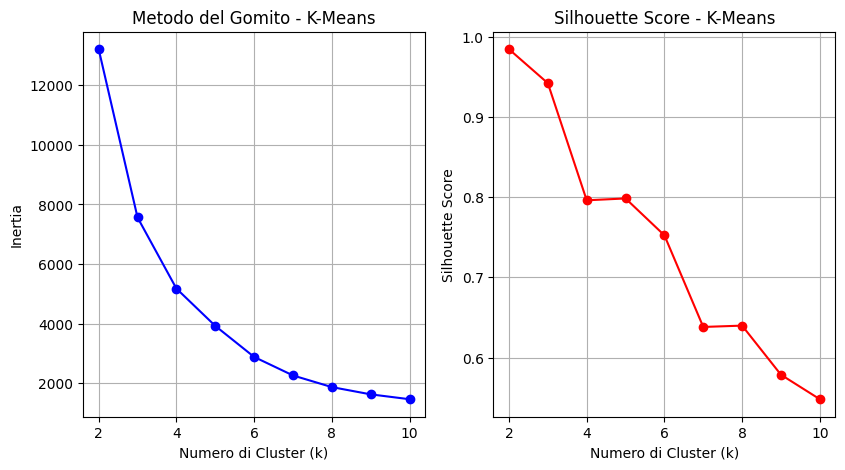

In [96]:
# 1. K-MEANS CLUSTERING
# Trova il numero ottimale di cluster usando il metodo del gomito
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clean)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clean, kmeans.labels_))

# Visualizza il metodo del gomito
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito - K-Means')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score - K-Means')
plt.grid(True)


k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_clean)

print(f"K-Means con k={k_optimal}:")
print(f"Silhouette Score: {silhouette_score(X_clean, kmeans_labels):.3f}")
print(f"Distribuzione cluster: {np.bincount(kmeans_labels)}")

In [97]:
# 2. DBSCAN CLUSTERING
# Prova diversi valori di eps
eps_values = np.arange(0.3, 2.0, 0.1)
dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_clean)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    if n_clusters > 1:
        silhouette = silhouette_score(X_clean, labels)
        dbscan_results.append((eps, n_clusters, n_noise, silhouette, labels))

# Trova il miglior eps per DBSCAN
if dbscan_results:
    best_dbscan = max(dbscan_results, key=lambda x: x[3])  # Migliore silhouette score
    best_eps, best_n_clusters, best_n_noise, best_silhouette, dbscan_labels = best_dbscan
    
    print(f"\nDBSCAN con eps={best_eps:.1f}:")
    print(f"Numero di cluster: {best_n_clusters}")
    print(f"Punti rumore: {best_n_noise}")
    print(f"Silhouette Score: {best_silhouette:.3f}")
    print(f"Distribuzione cluster: {np.bincount(dbscan_labels[dbscan_labels >= 0])}")
else:
    # Fallback se nessun buon risultato
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_clean)
    best_eps = 0.5


DBSCAN con eps=1.9:
Numero di cluster: 2
Punti rumore: 25
Silhouette Score: 0.898
Distribuzione cluster: [4309    5]



Varianza spiegata dalla PCA: 0.900
PC1: 0.509, PC2: 0.391


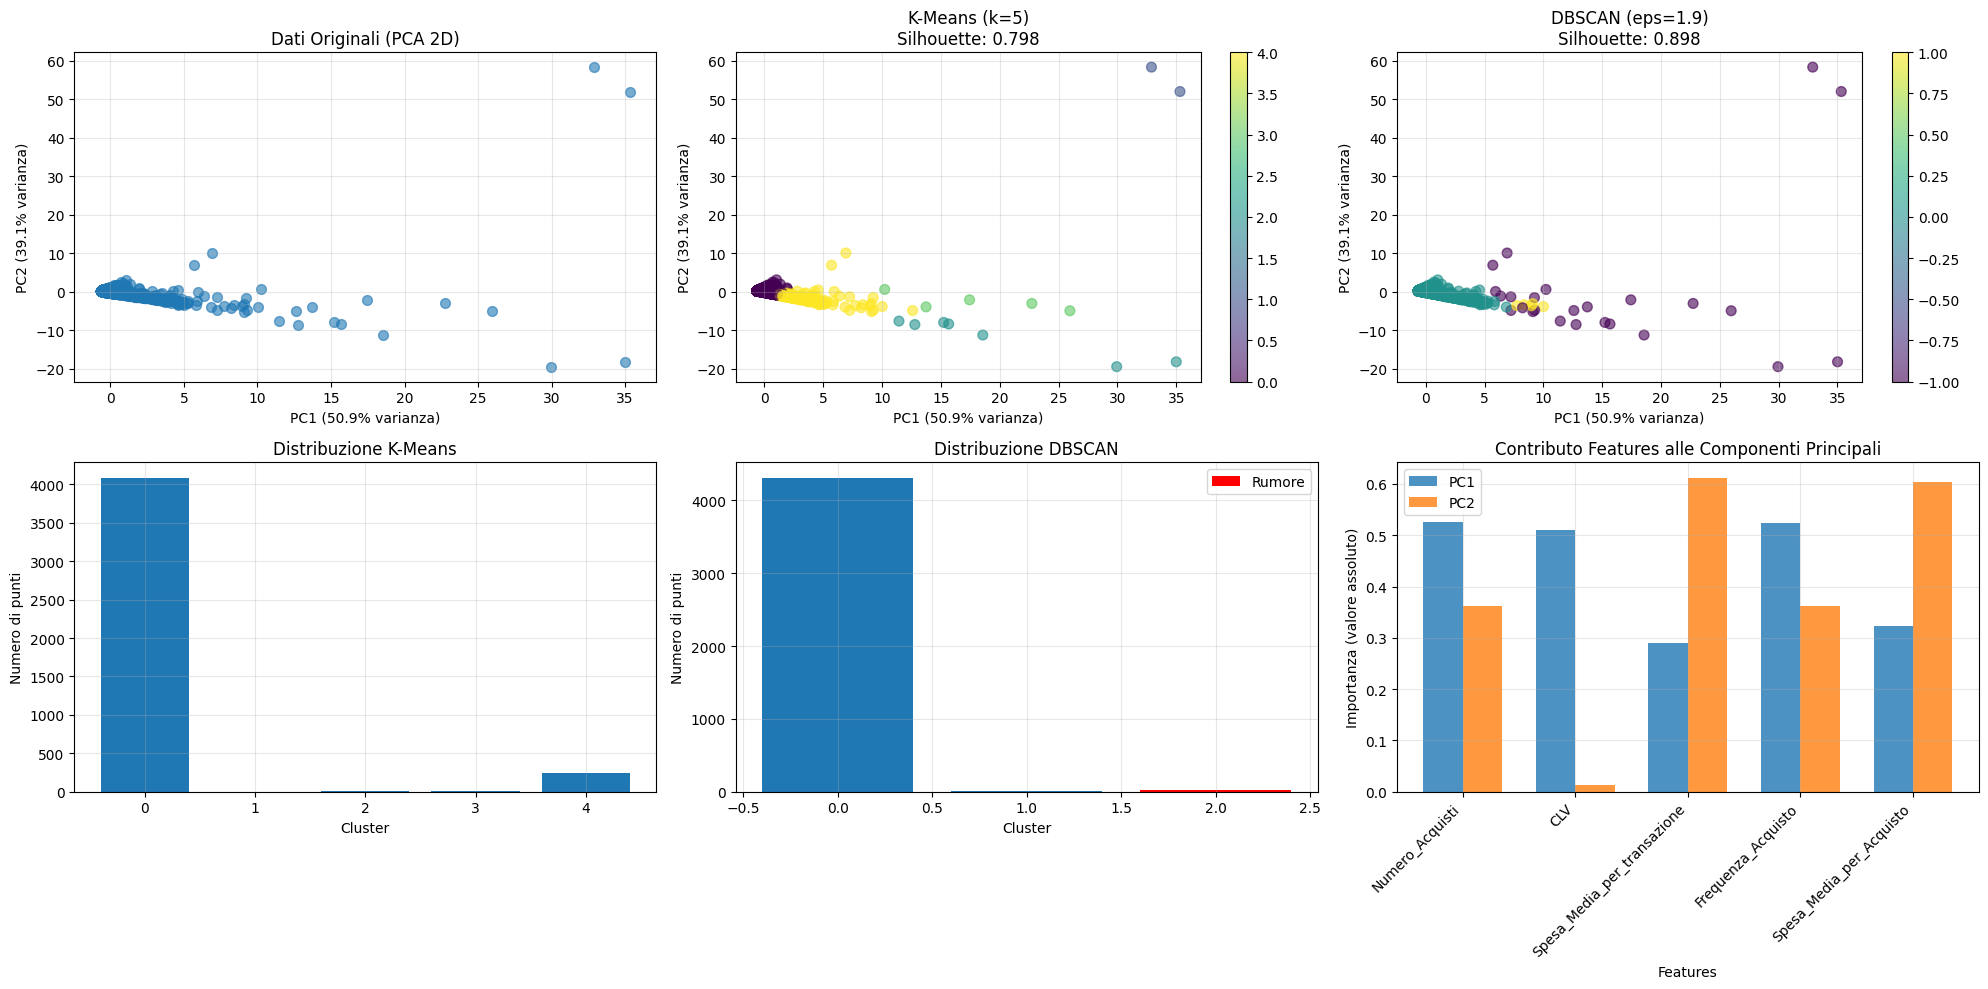

In [98]:
# 3. PCA per visualizzazione 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_clean)

print(f"\nVarianza spiegata dalla PCA: {pca.explained_variance_ratio_.sum():.3f}")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}, PC2: {pca.explained_variance_ratio_[1]:.3f}")

# 4. VISUALIZZAZIONE
plt.figure(figsize=(20, 10))

# Dati originali (senza clustering)
plt.subplot(2, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('Dati Originali (PCA 2D)')
plt.grid(True, alpha=0.3)

# K-Means clustering
plt.subplot(2, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title(f'K-Means (k={k_optimal})\nSilhouette: {silhouette_score(X_clean, kmeans_labels):.3f}')
plt.grid(True, alpha=0.3)

# DBSCAN clustering
plt.subplot(2, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
if dbscan_results:
    plt.title(f'DBSCAN (eps={best_eps:.1f})\nSilhouette: {best_silhouette:.3f}')
else:
    plt.title(f'DBSCAN (eps={best_eps:.1f})')
plt.grid(True, alpha=0.3)

# Confronto distribuzione cluster
plt.subplot(2, 3, 4)
plt.bar(range(len(np.bincount(kmeans_labels))), np.bincount(kmeans_labels))
plt.xlabel('Cluster')
plt.ylabel('Numero di punti')
plt.title('Distribuzione K-Means')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
dbscan_counts = np.bincount(dbscan_labels[dbscan_labels >= 0])
plt.bar(range(len(dbscan_counts)), dbscan_counts)
if best_n_noise > 0:
    plt.bar(len(dbscan_counts), best_n_noise, color='red', label='Rumore')
    plt.legend()
plt.xlabel('Cluster')
plt.ylabel('Numero di punti')
plt.title('Distribuzione DBSCAN')
plt.grid(True, alpha=0.3)

# Feature importance da PCA
plt.subplot(2, 3, 6)
feature_names = [name.replace('_normalized', '') for name in numeric_features]
pc1_importance = np.abs(pca.components_[0])
pc2_importance = np.abs(pca.components_[1])

x = np.arange(len(feature_names))
width = 0.35

plt.bar(x - width/2, pc1_importance, width, label='PC1', alpha=0.8)
plt.bar(x + width/2, pc2_importance, width, label='PC2', alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Importanza (valore assoluto)')
plt.title('Contributo Features alle Componenti Principali')
plt.xticks(x, feature_names, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()